# A comparison of LSTM and GRU performance
This notebook tests the performance of LSTM and GRU models on the sine wave.
<br>Special thanks to examples on MLM:
<br>https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [3]:
# function: convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
data_1_sin = numpy.sin(range(1, 10001))
data_1_sin = data_1_sin.reshape(10000, 1)

In [5]:
data_2 = numpy.array(list(range(1, 10001,1)))
data_2 = data_2 + 20000
data_2_sin = numpy.sin(data_2)
data_2_sin = data_2_sin.reshape(10000, 1)

In [6]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(data_1_sin, look_back)
testX, testY = create_dataset(data_2_sin, look_back)

In [7]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[2]))

In [9]:
# create and fit the LSTM network
model_LSTM = Sequential()
model_LSTM.add(LSTM(4, input_shape=(1, look_back)))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# create and fit the GRU network
model_GRU = Sequential()
model_GRU.add(GRU(4, input_shape=(1, look_back), activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True,
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', 
                  kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                  activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                  dropout=0.0, recurrent_dropout=0.0))
model_GRU.add(Dense(1))
model_GRU.compile(loss='mean_squared_error', optimizer='adam')

In [11]:
# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='loss', patience=20)]

In [12]:
model_LSTM.fit(trainX, trainY, epochs=500, batch_size = 256, callbacks=callbacks, verbose=0)

In [13]:
model_GRU.fit(trainX, trainY, epochs=500, batch_size = 256, callbacks=callbacks, verbose=0)

In [14]:
# make predictions
trainPredict_LSTM = model_LSTM.predict(trainX)
testPredict_LSTM = model_LSTM.predict(testX)
trainPredict_GRU = model_GRU.predict(trainX)
testPredict_GRU = model_GRU.predict(testX)

In [15]:
# calculate training error
trainScore_LSTM = math.sqrt(mean_squared_error(trainY, trainPredict_LSTM[:,0]))
print('Train Score LSTM: %.5f RMSE' % (trainScore_LSTM))
trainScore_GRU = math.sqrt(mean_squared_error(trainY, trainPredict_GRU[:,0]))
print('Train Score GRU: %.5f RMSE' % (trainScore_GRU))

Train Score LSTM: 0.00070 RMSE
Train Score GRU: 0.00065 RMSE


In [16]:
# calculate test error
testScore_LSTM = math.sqrt(mean_squared_error(testY, testPredict_LSTM[:,0]))
print('Train Score: %.5f RMSE' % (testScore_LSTM))
testScore_GRU = math.sqrt(mean_squared_error(testY, testPredict_GRU[:,0]))
print('Train Score: %.5f RMSE' % (testScore_GRU))

Train Score: 0.00070 RMSE
Train Score: 0.00065 RMSE


In [17]:
# shift train predictions for plotting
trainPredictPlot_LSTM = numpy.empty_like(data_1_sin[0:100])
trainPredictPlot_LSTM[:, :] = numpy.nan
trainPredictPlot_LSTM[look_back:len(trainPredict_LSTM)+look_back, :] = trainPredict_LSTM[0:90]

In [18]:
# shift train predictions for plotting
trainPredictPlot_GRU = numpy.empty_like(data_1_sin[0:100])
trainPredictPlot_GRU[:, :] = numpy.nan
trainPredictPlot_GRU[look_back:len(trainPredict_GRU)+look_back, :] = trainPredict_GRU[0:90]

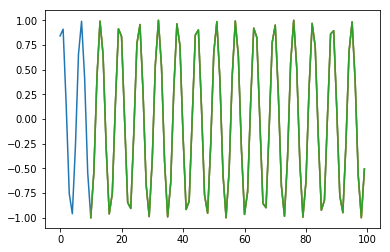

In [19]:
# plot baseline and predictions
plt.plot(data_1_sin[0:100])
plt.plot(trainPredictPlot_LSTM)
plt.plot(trainPredictPlot_GRU)
plt.show()

In [20]:
# shift test predictions for plotting
testPredictPlot_LSTM = numpy.empty_like(data_2_sin[0:100])
testPredictPlot_LSTM[:, :] = numpy.nan
testPredictPlot_LSTM[look_back:len(testPredict_LSTM)+look_back, :] = testPredict_LSTM[0:90]

In [21]:
# shift test predictions for plotting
testPredictPlot_GRU = numpy.empty_like(data_2_sin[0:100])
testPredictPlot_GRU[:, :] = numpy.nan
testPredictPlot_GRU[look_back:len(testPredict_GRU)+look_back, :] = testPredict_GRU[0:90]

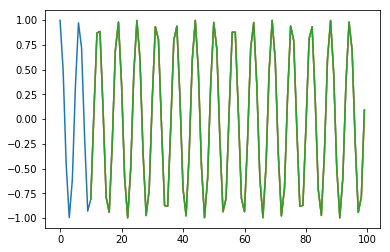

In [22]:
# plot test and predictions
plt.plot(data_2_sin[0:100])
plt.plot(testPredictPlot_LSTM)
plt.plot(testPredictPlot_GRU)
plt.show()

# Final conclusion
### GRU slightly better than GRU on both train & test